## This Notebook is to Find the best model For the Credit Card Churn

### Load packages and library

In [1]:
import pandas as pd
import numpy as np
from numpy import load
import plotly.express as px
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics, svm
import plotly
import os

### load array from the previous ETL

In [2]:
# load array from the previous ETL
X_train = load('X_train.npy')
X_test = load('X_test.npy')
y_train = load('y_train.npy')
y_test = load('y_test.npy')
X_train_scaled = load('X_train_scaled.npy')
X_test_scaled = load('X_test_scaled.npy')

Now that the train and test data were loaded, model can be tested

## Load functions to get confusion matrix and classifier report

In [3]:
def conf_matrix(classifier, Title, ydata, xdata):
    cf = metrics.confusion_matrix(ydata, classifier.predict(xdata), labels=[1,0])
    x_axis_labels=['Attrited','Existing']
    y_axis_labels=['Attrited','Existing']

    ax = plt.axes()
    sns.heatmap(cf, ax = ax,annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax.set_title(Title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.show()
    
def class_report(classifier, ydata, xdata):
    print(metrics.classification_report(ydata,classifier.predict(xdata), labels=[1,0]))
    print('Accuracy_Score:',accuracy_score(ydata,classifier.predict(xdata))*100,'%')
    print('Recall:',metrics.recall_score(ydata, classifier.predict(xdata))*100,'%')

## Lets try The Machine Learning 

# 1. Random Forest Classifier

In [4]:
rf=RandomForestClassifier()

In [5]:
rf.fit(X_train, y_train)

RandomForestClassifier()

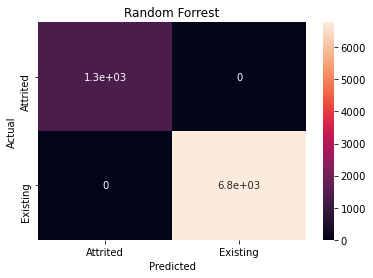

In [6]:
conf_matrix(rf, 'Random Forrest', y_train, X_train)

It is great to see that the model fit perfectly for the train data

### Try it on the test data

In [7]:
class_report(rf, y_test, X_test)

              precision    recall  f1-score   support

           1       0.92      0.82      0.87       301
           0       0.97      0.99      0.98      1725

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026

Accuracy_Score: 96.29812438302073 %
Recall: 82.05980066445183 %


In [8]:
metrics.f1_score(y_test,rf.predict(X_test))

0.8681898066783832

# 2. Logistic Regression

### Load all packages and library 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

In [10]:
pipe = make_pipeline(StandardScaler(),LogisticRegression())

In [11]:
lr = pipe.fit(X_train, y_train)
lr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

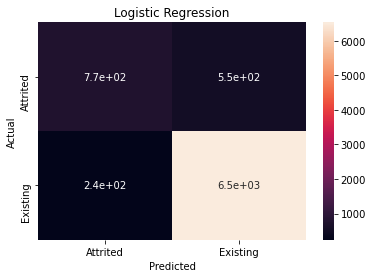

In [12]:
conf_matrix(lr, "Logistic Regression", y_train, X_train)

### Try it on the test data 

In [13]:
class_report(lr, y_test, X_test)

              precision    recall  f1-score   support

           1       0.76      0.60      0.67       301
           0       0.93      0.97      0.95      1725

    accuracy                           0.91      2026
   macro avg       0.85      0.78      0.81      2026
weighted avg       0.91      0.91      0.91      2026

Accuracy_Score: 91.31293188548865 %
Recall: 60.13289036544851 %


# 3. XGBoost Classifier

In [14]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[07:58:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

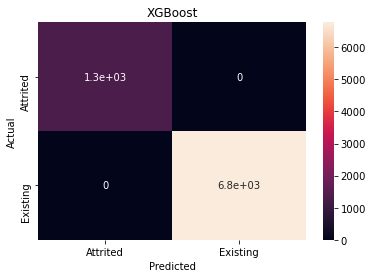

In [15]:
conf_matrix(xgb, 'XGBoost', y_train, X_train)

### Try it on the test data 

In [16]:
class_report(xgb, y_test, X_test)

              precision    recall  f1-score   support

           1       0.92      0.86      0.89       301
           0       0.98      0.99      0.98      1725

    accuracy                           0.97      2026
   macro avg       0.95      0.92      0.94      2026
weighted avg       0.97      0.97      0.97      2026

Accuracy_Score: 96.79170779861796 %
Recall: 86.37873754152824 %


# 4. LGBM Classifier 

#### Light Gradient Boosting Machine 

In [17]:
lgbm=LGBMClassifier()

In [18]:
lgbm.fit(X_train, y_train)

LGBMClassifier()

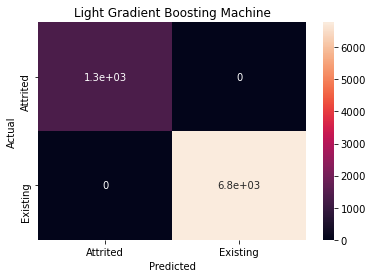

In [19]:
conf_matrix(lgbm, "Light Gradient Boosting Machine", y_train, X_train)

### Try it on test data 

In [20]:
class_report(lgbm, y_test, X_test)

              precision    recall  f1-score   support

           1       0.92      0.88      0.90       301
           0       0.98      0.99      0.98      1725

    accuracy                           0.97      2026
   macro avg       0.95      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026

Accuracy_Score: 97.08785784797631 %
Recall: 88.37209302325581 %


# 5. Try Neural Network 

### Load the necessary Packages 

In [21]:
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras import regularizers
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


### Scale the data using MinMaxScaler

The scaled data has actually been created in the ETL section, just in case the data has not been scaled, uncomment and execute the code below

In [22]:
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

Just to check the shape of the scaled data

In [23]:
print(X_train_scaled.shape, 'and', X_test_scaled.shape)

(8101, 19) and (2026, 19)


### Create a model

In [24]:
model1 = Sequential()
model1.add(Dense(256, kernel_regularizer=regularizers.l2(0.001), input_dim=19, activation='relu'))
model1.add(Dropout(rate=0.2))
model1.add(Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model1.add(Dropout(rate=0.2))
model1.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model1.add(Dropout(rate=0.2))
model1.add(Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model1.add(Dropout(rate=0.2))
model1.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model1.add(Dropout(rate=0.2))
model1.add(Dense(8, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model1.add(Dropout(rate=0.1))
model1.add(Dense(1, activation='sigmoid'))

### Compile the model and fit the model using the scaled data 

In [25]:
model1.compile(loss = "binary_crossentropy", 
                  optimizer = 'adam', 
                  metrics=['accuracy'])
    

history = model1.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=150, batch_size=32, verbose=0)
history
score = model1.evaluate(X_test_scaled, y_test, verbose=0)

### Plot the test vs train accuracy

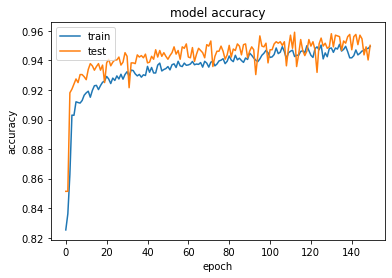

In [26]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

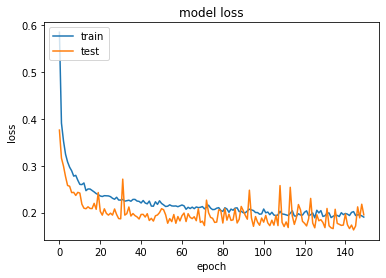

In [27]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

### Save the model1 to json and hdf5 file

In [28]:
from keras.models import model_from_json

In [29]:
# serialize model to JSON
model_json = model1.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model1.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


###  Load The model

In [30]:
# load json and create model
json_file = open('model.json', 'r')
nn_model_json = json_file.read()
json_file.close()
nn_model = model_from_json(nn_model_json)
# load weights into new model
nn_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


### Evaluate using Loaded Model 

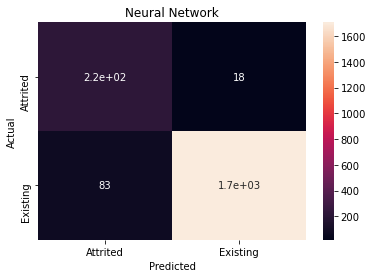

In [31]:
# Evaluation:
yprednn=nn_model.predict(X_test_scaled)
yprednn=yprednn.round()


cf = metrics.confusion_matrix(yprednn, y_test, labels=[1,0])
x_axis_labels=['Attrited','Existing']
y_axis_labels=['Attrited','Existing']

ax = plt.axes()
sns.heatmap(cf, ax = ax,annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax.set_title('Neural Network')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [32]:
print('Neural Network:\n {}\n'.format(
    metrics.classification_report(yprednn, y_test)))

nn_conf_matrix=metrics.confusion_matrix(yprednn,y_test)
conf_mat_nn = pd.DataFrame(nn_conf_matrix, 
    columns=["Predicted Existing", "Predicted Attrited"], 
    index=["Actual Existing", "Actual Attrited"])
print(conf_mat_nn)


Neural Network:
               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1790
         1.0       0.72      0.92      0.81       236

    accuracy                           0.95      2026
   macro avg       0.86      0.94      0.89      2026
weighted avg       0.96      0.95      0.95      2026


                 Predicted Existing  Predicted Attrited
Actual Existing                1707                  83
Actual Attrited                  18                 218


## 6. Try a wider Neural Network model 

In [40]:
model2 = Sequential()
model2.add(Dense(256, kernel_regularizer=regularizers.l2(0.001), input_dim=19, activation='relu'))
model2.add(Dropout(rate=0.2))
model2.add(Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model2.add(Dropout(rate=0.2))
model2.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model2.add(Dropout(rate=0.1))
model2.add(Dense(1, activation='sigmoid'))

In [41]:
model2.compile(loss = "binary_crossentropy", 
                  optimizer = 'adam', 
                  metrics=['accuracy'])
    

history2 = model2.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=150, batch_size=32, verbose=0)
history2
score2 = model2.evaluate(X_test_scaled, y_test, verbose=0)

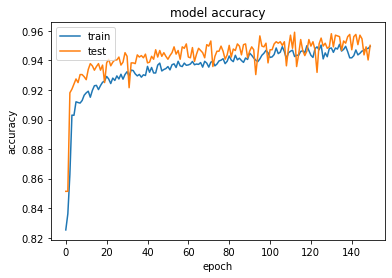

In [42]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

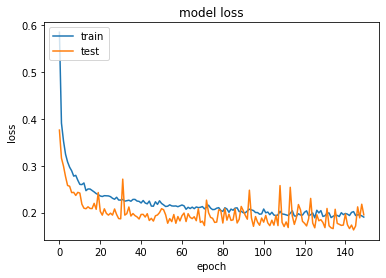

In [43]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [33]:
from sklearn import ensemble

In [34]:
df_churn = pd.read_csv('df_churn.csv')

<AxesSubplot:>

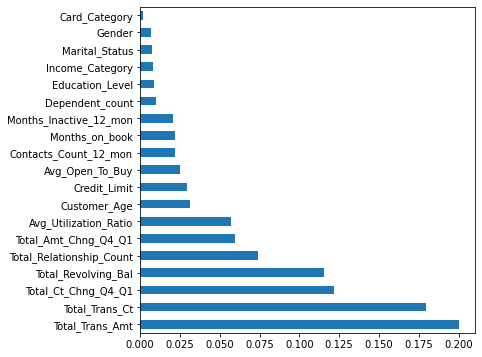

In [35]:
rf =  ensemble.RandomForestClassifier(n_estimators=130,max_features=6, n_jobs=-1)
rf.fit(X_train, y_train)
feature_importance = rf.feature_importances_
feat_importances = pd.Series(rf.feature_importances_, index=df_churn.iloc[:,1:].columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(6,6))

# SUMMARY 

Create a dataframe containing 

In [36]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [37]:
model_name = ['Random Forest','Logistic Regression', 'XGBoost', 'LGBM', 'Neural Network']
accuracy = []
f1 = []
recall = []

model_code = [rf, lr, xgb, lgbm, nn_model]

for i in model_code:
    if i == nn_model or i ==:
        accuracy.append(round(history.history['val_accuracy'][149]*100,2))
        f1.append(round(metrics.f1_score(y_test, yprednn)*100,2))
        recall.append(round(metrics.recall_score(y_test, yprednn)*100,2))
    else:
        accuracy.append(round(accuracy_score(y_test, i.predict(X_test))*100,2))
        f1.append(round(metrics.f1_score(y_test, i.predict(X_test))*100,2))
        recall.append(round(metrics.recall_score(y_test, i.predict(X_test))*100,2))

In [38]:
summary = pd.DataFrame({'Model': model_name, 'Accuracy': accuracy, 'f1 Score': f1, 'Recall': recall})

In [39]:
summary.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,f1 Score,Recall
3,LGBM,97.09,90.02,88.37
2,XGBoost,96.79,88.89,86.38
0,Random Forest,96.54,87.80,83.72
4,Neural Network,95.01,81.19,72.43
1,Logistic Regression,91.31,67.29,60.13
